### Import All the Dependencies for Data Distribution Analysis and Hashtag Wordcloud

In [3]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
!pip install wordcloud
!pip install plotly
from pandas.io.json import json_normalize
import warnings
from sklearn.feature_extraction.text import CountVectorizer
import random
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

## Central Tendencies of the Twitter Sentiment Dataset

### Load the Dataset

In [5]:
sentiment_data_df = pd.read_csv("Datasets/TwitterSentimentAnalysis/Datasets_Final_Project/tweet_sentiments_with_additional_countries_with_0.3_bins.csv")
sentiment_data_df.head(3)

,tweetcreatedts,text,location,hashtags,retweetcount,favorite_count,country,neg,neu,pos,compound,sentiment,neg.1,neu.1,pos.1,compound.1
0,2022-03-08,a fox s tale for,Orkney Scotland,"[{'text': 'Ukraine', 'indices': [19, 27]}]",0.0,0.0,uk,0.0,1.0,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,2022-03-08,ukraine,"Hyères, France","[{'text': 'Ukraine', 'indices': [11, 19]}, {'t...",0.0,0.0,france,0.0,1.0,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-03-08,russia s enlargement redlines cable from...,"Essonne, Ile-de-France","[{'text': 'NATO', 'indices': [25, 30]}, {'text...",1377.0,0.0,france,0.0,1.0,0.0,0.0,neutral,0.0,1.0,0.0,0.0


### Central Tendencies Analysis

In [6]:
data_describe = sentiment_data_df[['compound']].describe()
data_describe

,compound
count,2.103692e+06
mean,-6.698872e-02
std,5.278712e-01
min,-9.977000e-01
25%,-5.267000e-01
50%,0.000000e+00
75%,3.818000e-01
max,9.961000e-01


### Plot the summary of the data

Text(0, 0.5, 'Sentiment Score')

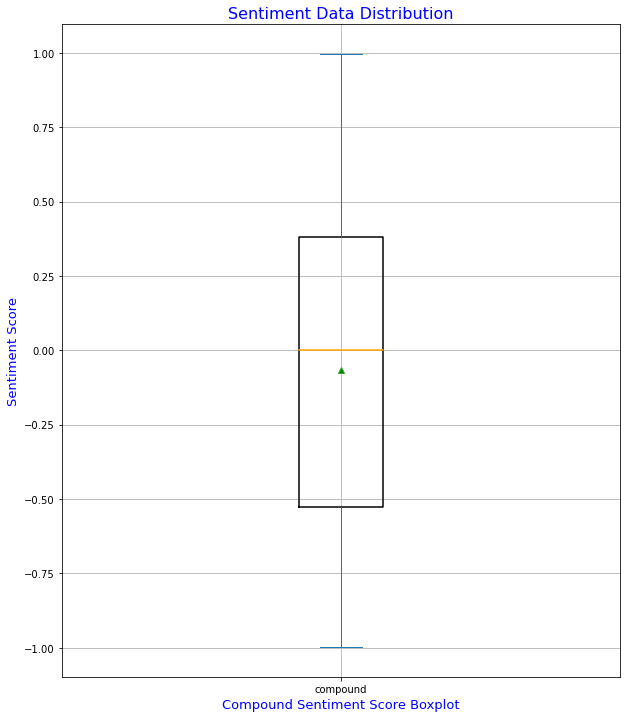

In [8]:
# plot a boxplot
sentiment_scores = sentiment_data_df['compound']

box_props = dict(color="black",linewidth=1.5)
median_props = dict(color="orange",linewidth=1.5)
mean_props = dict(markerfacecolor='green',marker='^')
grid_props = dict(c='grey',linewidth=0.5)
sentiment_scores.plot(kind = 'box',meanprops=mean_props,showmeans=True,medianprops=median_props,boxprops=box_props,grid=True,figsize=(10,12))
plt.title('Sentiment Data Distribution',fontsize=16, c = 'blue')
plt.xlabel('Compound Sentiment Score Boxplot',fontsize=13, c = 'blue')
plt.ylabel('Sentiment Score',fontsize=13, c = 'blue')

### Distribution of the Tweet Sentiment Data

Text(0.5, 0, 'Sentiment Scores')

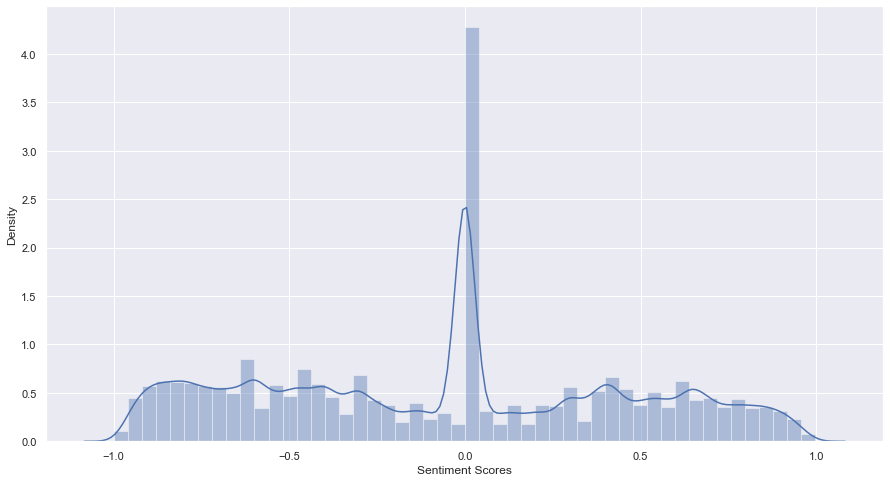

In [9]:
# using seaborn library for visualization for histogram of data distribution
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.distplot(sentiment_scores)
p.set_xlabel('Sentiment Scores')

### Sentiment data distribution along with the rugplot

<AxesSubplot:xlabel='compound', ylabel='Density'>

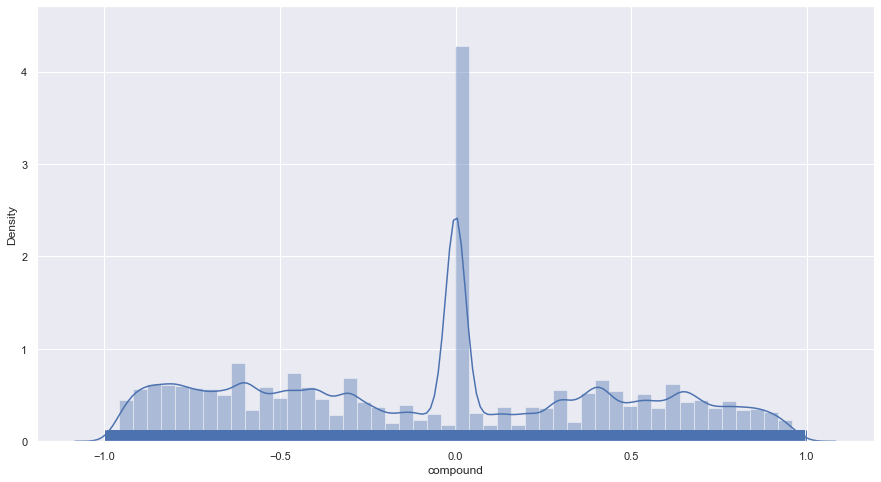

In [277]:
# rugplot (dark blue line at the bottom) is showing the location of individual observations
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.distplot(sentiment_scores,rug=True)
p.set_xlabel('Sentiment Scores')

## WordCloud

### Load the Tweets Sentiments Dataset into the notebook for Analysis and Wordcloud

In [2]:
# load tweet sentiment data into a dataframe
tweet_sentiment_df = pd.read_csv('Datasets_Final_Project/all_tweets_consolidated.csv')

/var/folders/36/42s_c14d5kv7yjr4yyn4sr6h0000gn/T/ipykernel_98539/3359672429.py:1: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_sentiment_df = pd.read_csv('Datasets_Final_Project/all_tweets_consolidated.csv')


In [18]:
# drop duplicate tweets with keeping unique tweetid
tweet_sentiment_df.drop_duplicates(['tweetid'],inplace=True)

In [117]:
# overview of data size
tweet_sentiment_df.shape

(10726248, 18)

In [184]:
# take a look at the dataframe
tweet_sentiment_df.head(5)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,3544308,454230077,veronicae9,NaN,madrid,3546.0,1459.0,119958.0,2012-01-03 19:23:33.000000,1500984943371030528.0,2022-03-08 00:01:12,35.0,Guillaume Briquet herido y hospitalizado en #M...,"[{'text': 'Mykolaev', 'indices': [60, 69]}]",es,NaN,0.0,2022-03-08 00:07:18.782816
1,3544309,1166381062248783874,forcemultstevea,AI startup advisor 'force multiplier' who shap...,Olympia WA,1020.0,731.0,101791.0,2019-08-27 16:05:01.000000,1500984943639289856.0,2022-03-08 00:01:12,32.0,"""Kyiv Ghost"" shot down the #Russian Caliber cr...","[{'text': 'Russian', 'indices': [45, 53]}, {'t...",en,NaN,0.0,2022-03-08 00:07:18.766227
2,3544310,159230211,tammytabby,"Native of New York City, NY. \nConservative.\n...",Georgia,15602.0,15597.0,411214.0,2010-06-24 20:40:35.000000,1500984943668834304.0,2022-03-08 00:01:12,79.0,#China wants to mediate the #Ukraine war to re...,"[{'text': 'China', 'indices': [18, 24]}, {'tex...",en,NaN,0.0,2022-03-08 00:07:18.758033
3,3544311,1498015615881302016,ArthurC54762353,NaN,NaN,1.0,3.0,394.0,2022-02-27 19:23:16.000000,1500984944117620736.0,2022-03-08 00:01:12,30.0,Russian soldiers killed the parents of a 17-ye...,[],en,NaN,0.0,2022-03-08 00:07:18.749824
4,3544312,867157331494268929,GideonNeptune,Heard expert say “30% of a given population at...,"Here, right now",14199.0,12827.0,134139.0,2017-05-23 23:16:33.000000,1500984944222478336.0,2022-03-08 00:01:12,127.0,If 80-year-old Ukrainian women are using their...,[],en,NaN,0.0,2022-03-08 00:07:18.741431


In [104]:
# transpose the dataframe to get a better look at the df properties
tweet_sentiment_df[0:2].T

,0,1
Unnamed: 0,3544308,3544309
userid,454230077,1166381062248783874
username,veronicae9,forcemultstevea
acctdesc,NaN,AI startup advisor 'force multiplier' who shap...
location,madrid,Olympia WA
following,3546.0,1020.0
followers,1459.0,731.0
totaltweets,119958.0,101791.0
usercreatedts,2012-01-03 19:23:33.000000,2019-08-27 16:05:01.000000
tweetid,1500984943371030528.0,1500984943639289856.0


### Extract all English hashtags from the dataframe

In [105]:
# make a dataframe of english hashtags
hashtags = tweet_sentiment_df[tweet_sentiment_df['language'] == 'en']['hashtags'].tolist()

# get the hashtags into a list form
hashtags=list(set(hashtags))

# create empty list to hold the items split in the first for loop
TAGS=[]
# this for loop iterates through the items in 'hashtags', splits them at '{' and stores the resulting strings into TAGS[] 
for item in hashtags:
    TAGS+=item[1:-1].split('{')

# create another empty list to hold the items split in the second for loop
TAGS2=[]
#this for loop iterates through the items in TAGS[], splits them first by ': ' then by ',' 
# and then stores the resulting strings into TAGS2[] skipping last item
for item2 in TAGS:
    if item2!='':
        TAGS2+=[item2.split(': ')[1].split(',')[0][1:-1]]

### Get the hashtag text into a dataframe

In [134]:
# convert list TAGS2 into a series and then convert series into a dataframe
hashtags_df_2 = pd.DataFrame(pd.Series(TAGS2))
hashtags_df_2.columns = ['hashtag']
hashtags_df_2.shape

(5505121, 1)

In [175]:
# take a look at data
hashtags_df_2

,hashtag
0,Putin
1,RussianWarCrimes
2,Ukraine
3,StandWithUkraine
4,ForYouthRights
...,...
5505116,Ukraine
5505117,avgeeks
5505118,aviation
5505119,Russia


## Cleaning Hashtags

### Using regex, let us clean the hashtags to have only english characters and/ numbers

In [292]:
# import dependencies for regex
import re
# clean the hashtag field to contain only english letters and/ numbers
hashtags_df_clean = hashtags_df_2['hashtag'].str.lower().replace(r"[^a-zA-Z0-9]+","",regex=True)

In [293]:
# create a value count column for wordcloud analysis
hashtags_clean_df = pd.DataFrame(pd.Series(hashtags_df_clean.value_counts(), name='count'))
hashtags_clean_df.head(3)

,count
ukraine,663370
russia,374960
putin,242156


In [294]:
# get the hashtags from index and populate them into a column
hashtags_clean_df['hashtag'] = hashtags_clean_df.index.tolist()
hashtags_clean_df.head(3)

,count,hashtag
ukraine,663370,ukraine
russia,374960,russia
putin,242156,putin


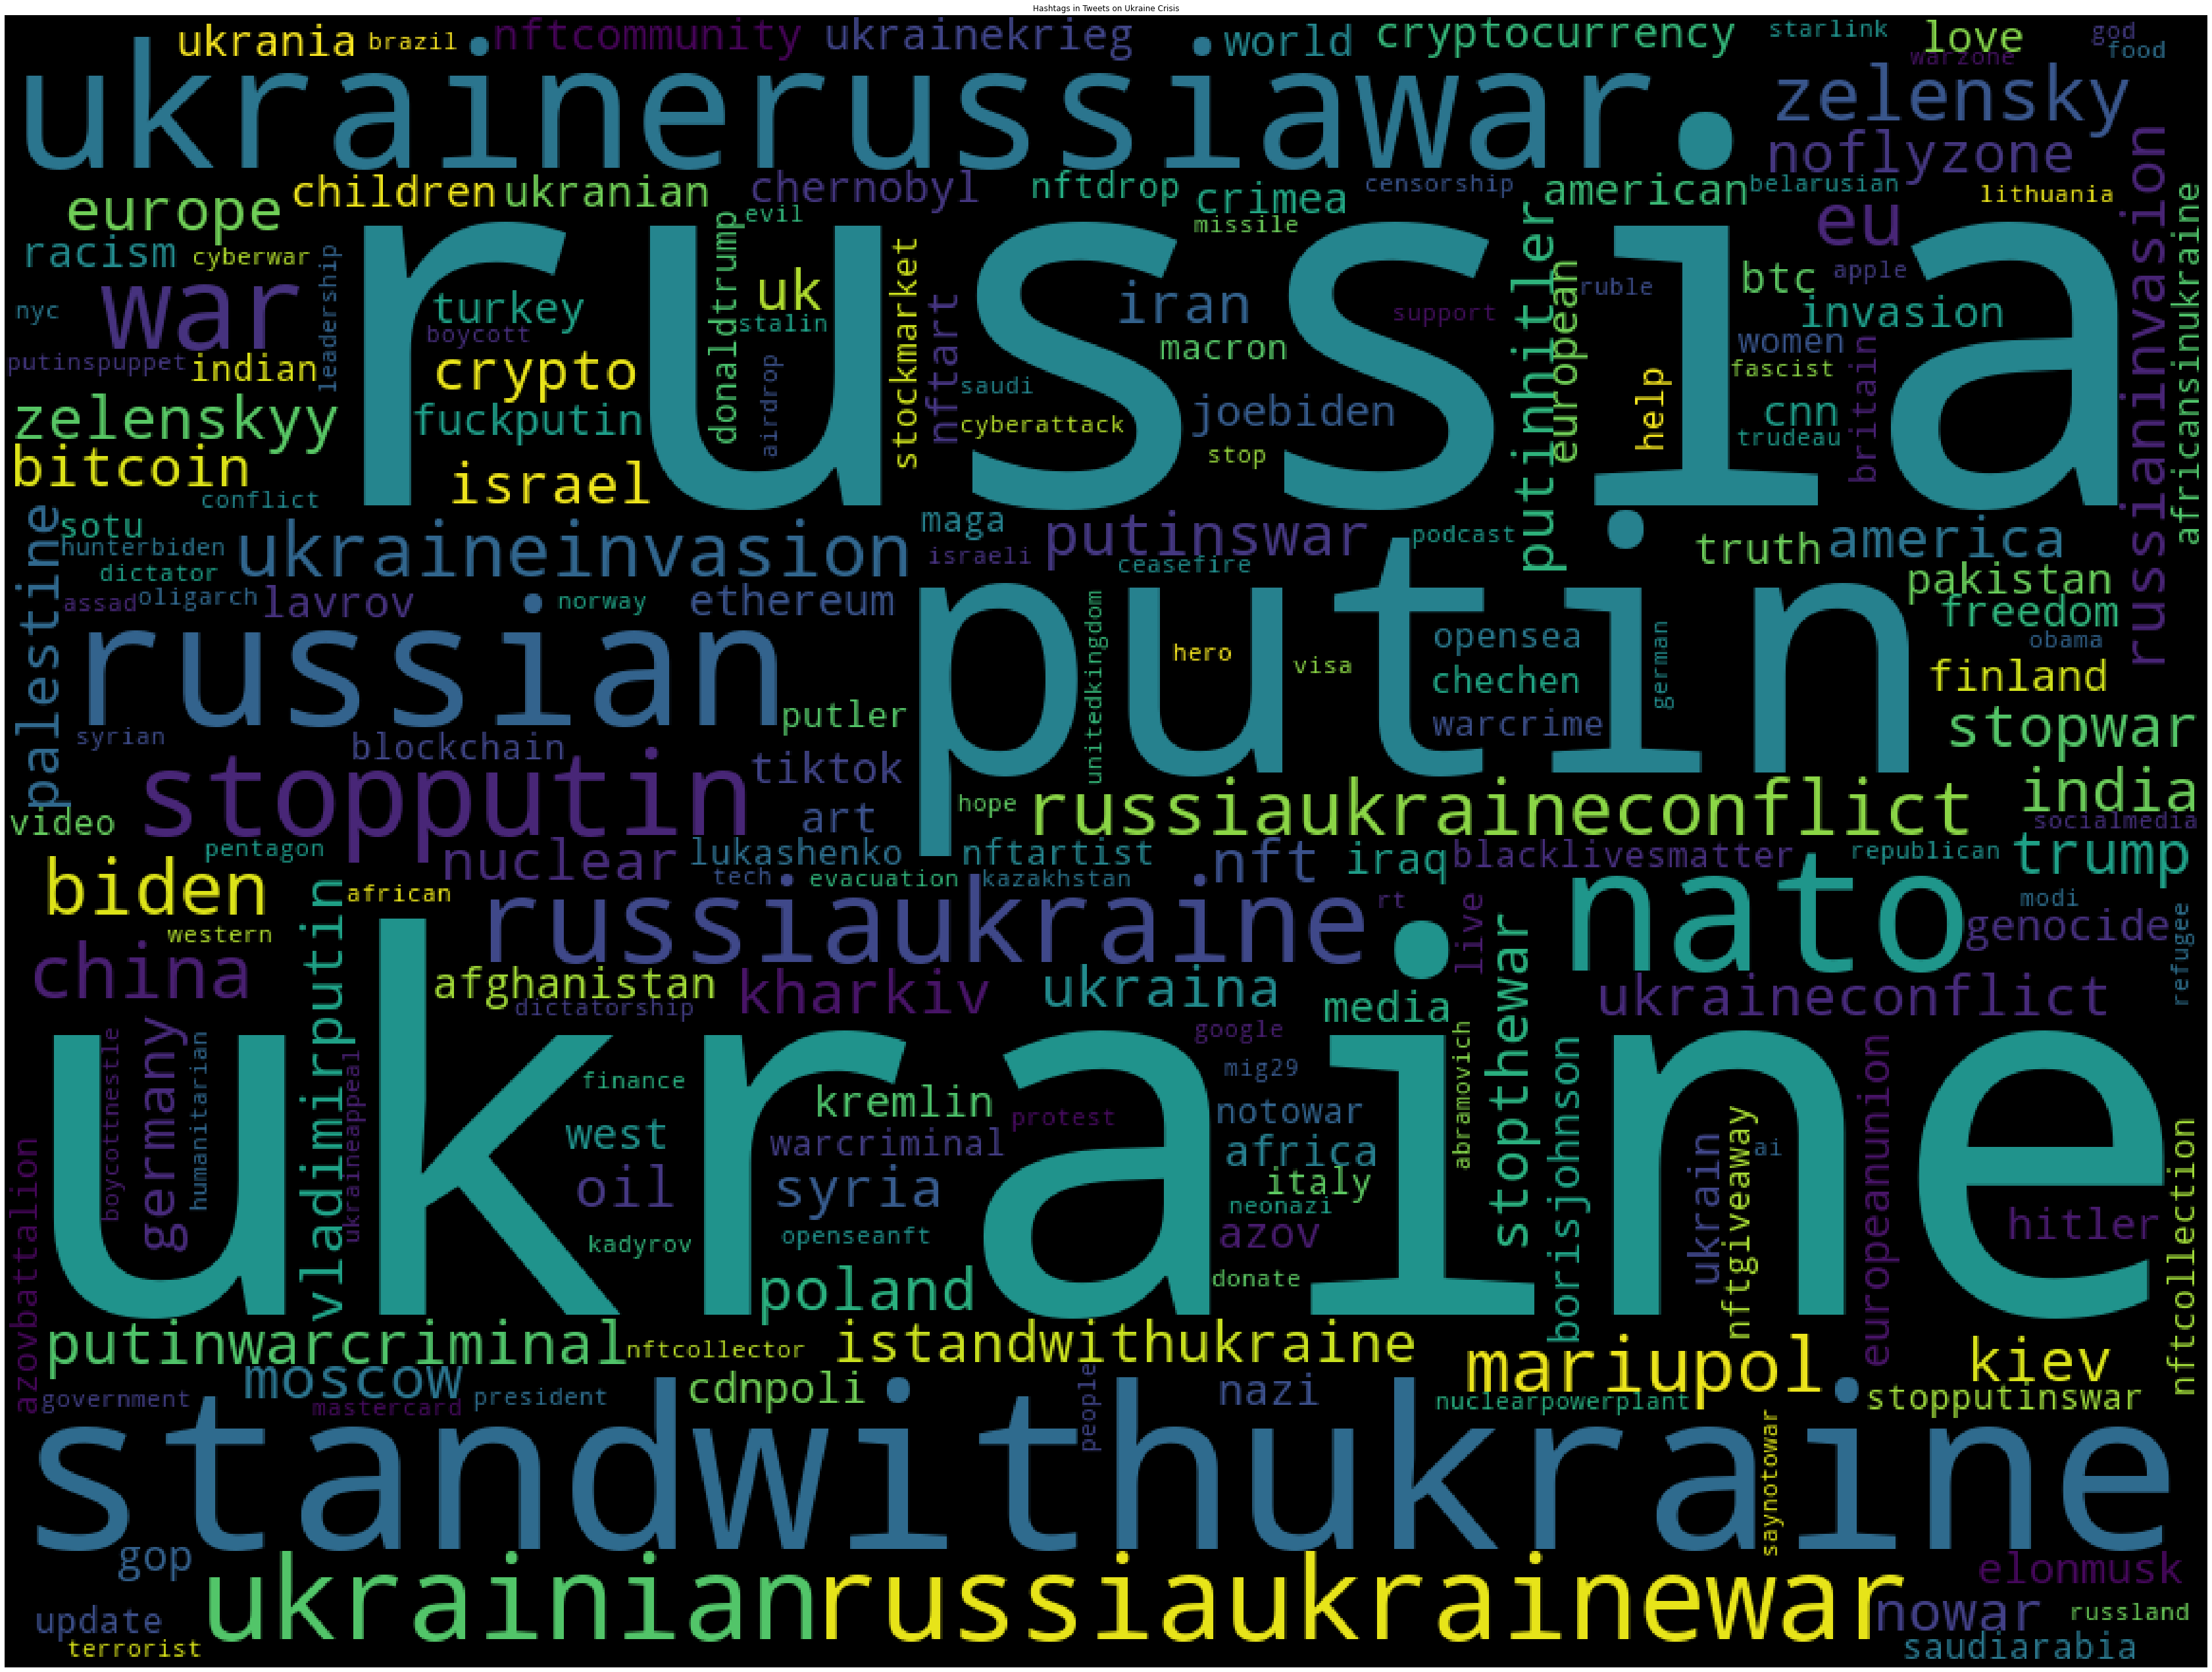

In [203]:
# Create a wordcloud of hashtags using WordCloud function
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

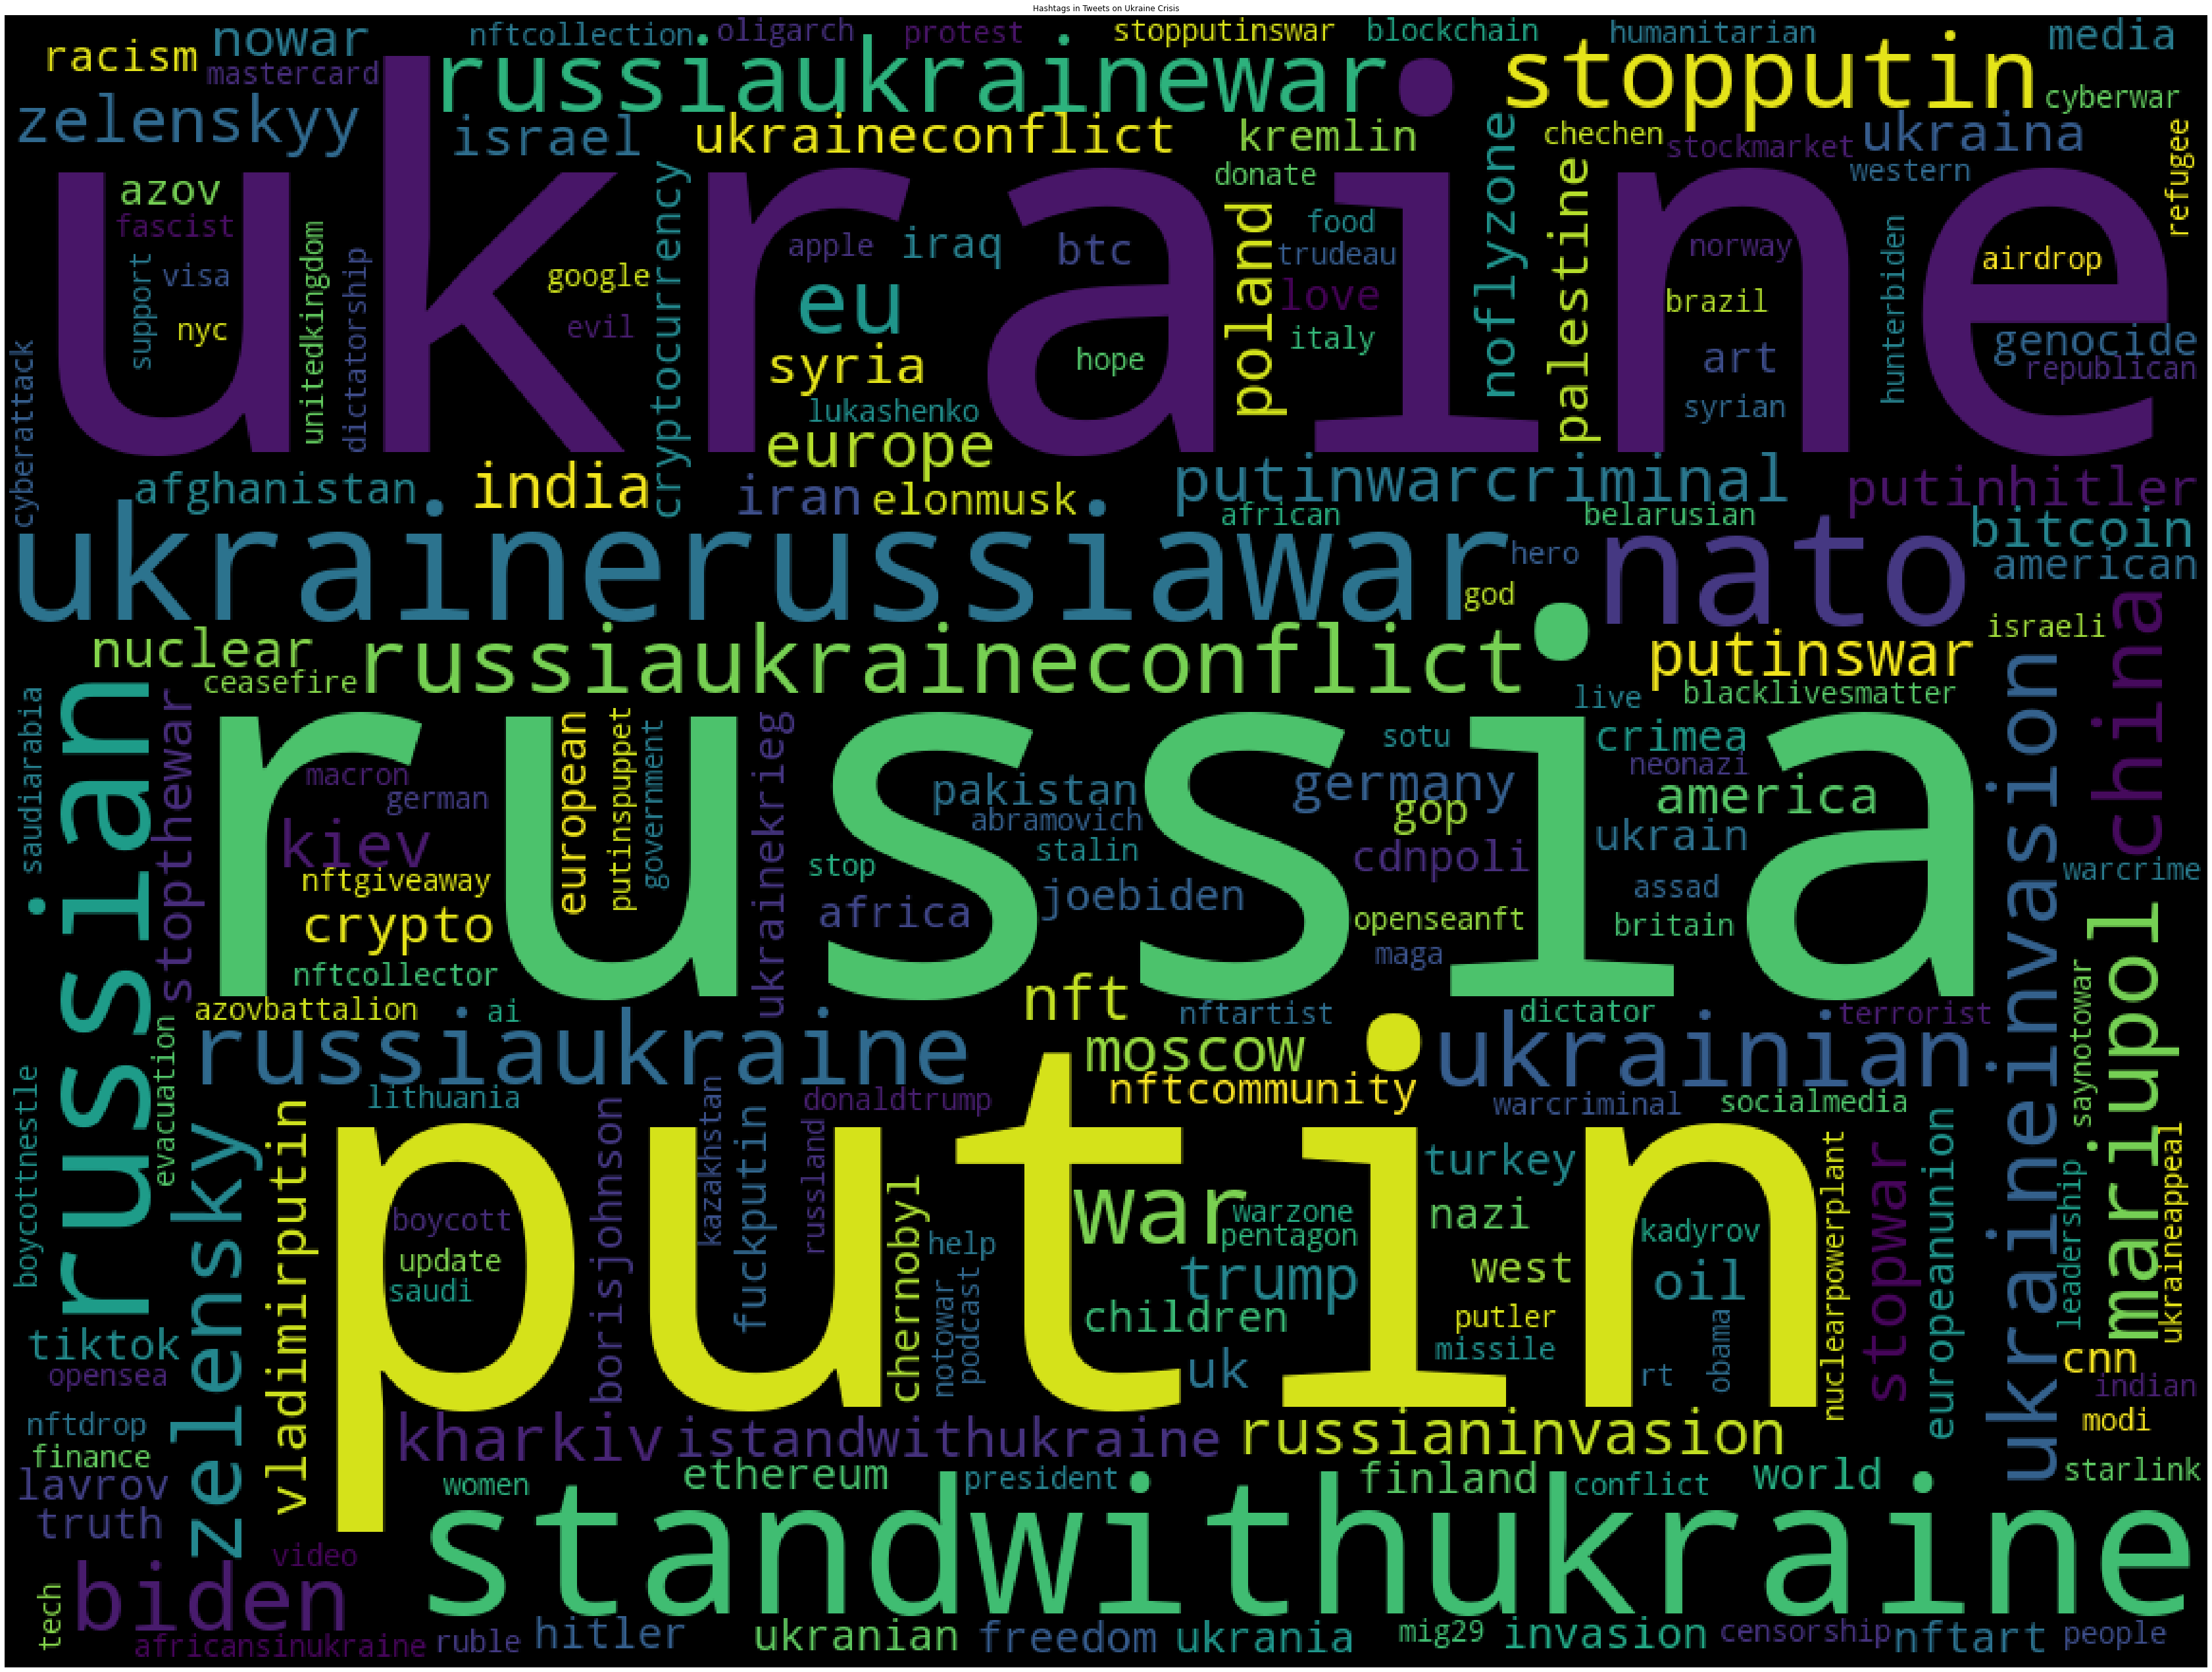

In [206]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

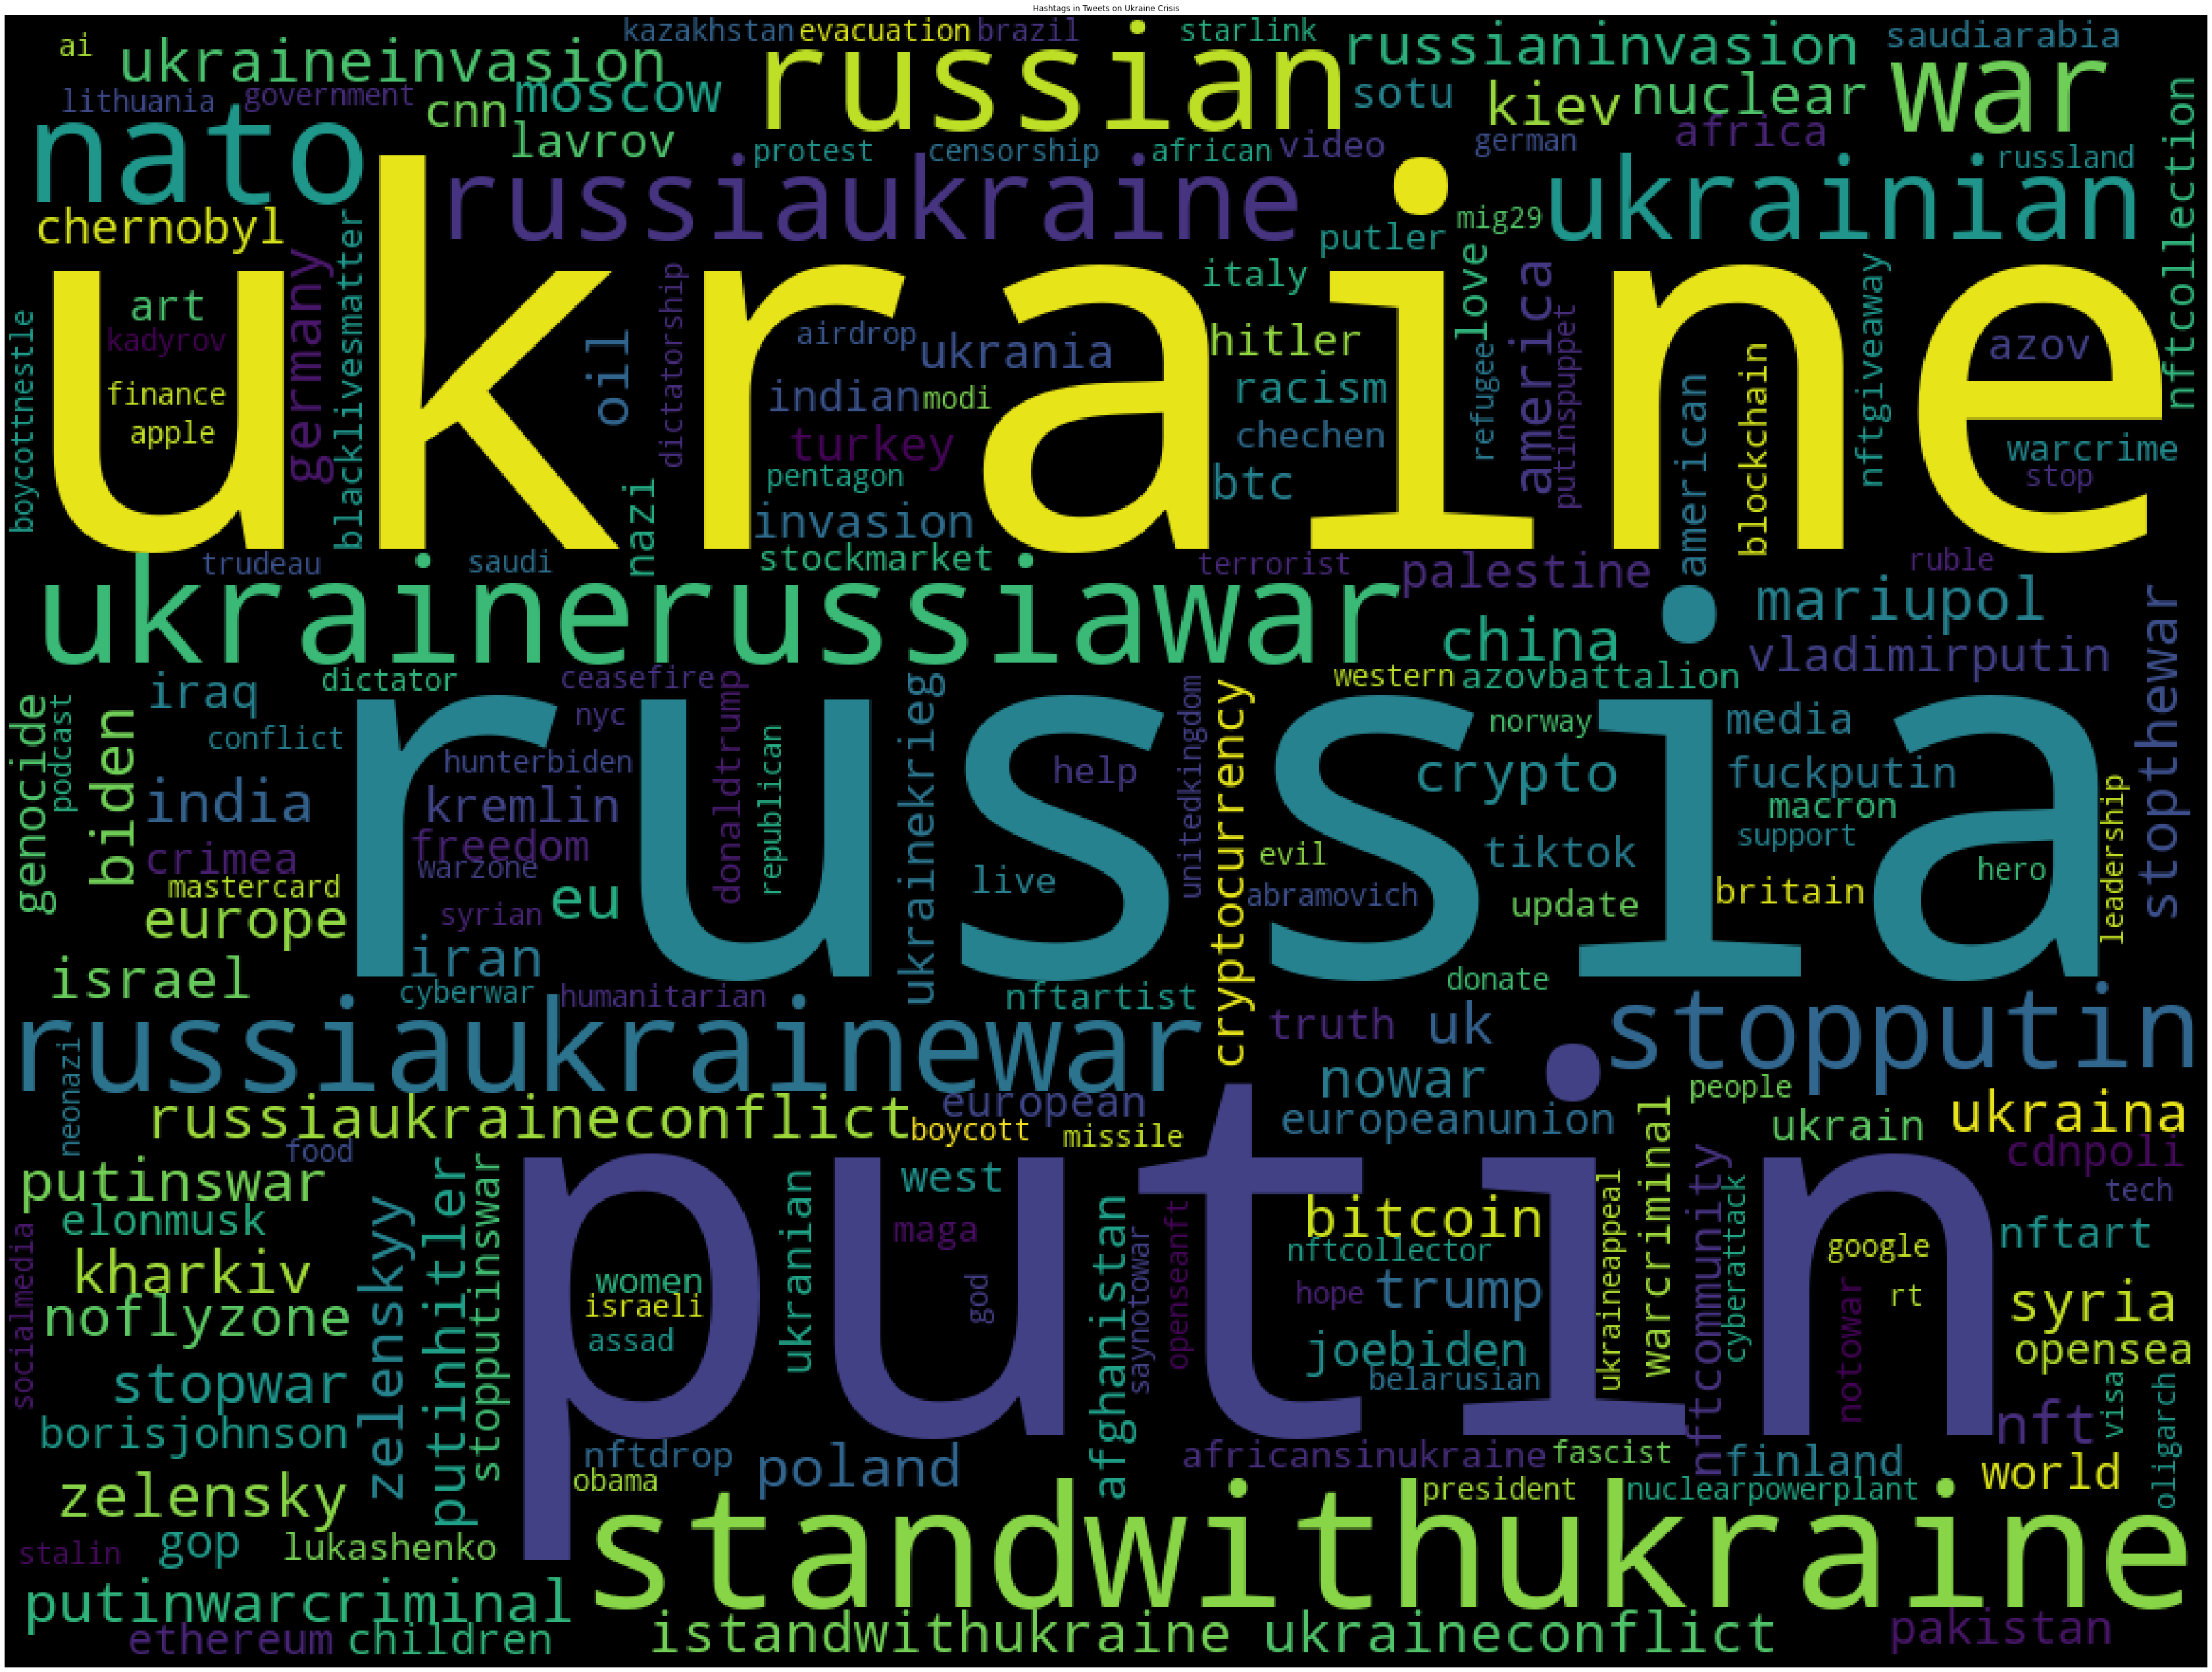

In [211]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

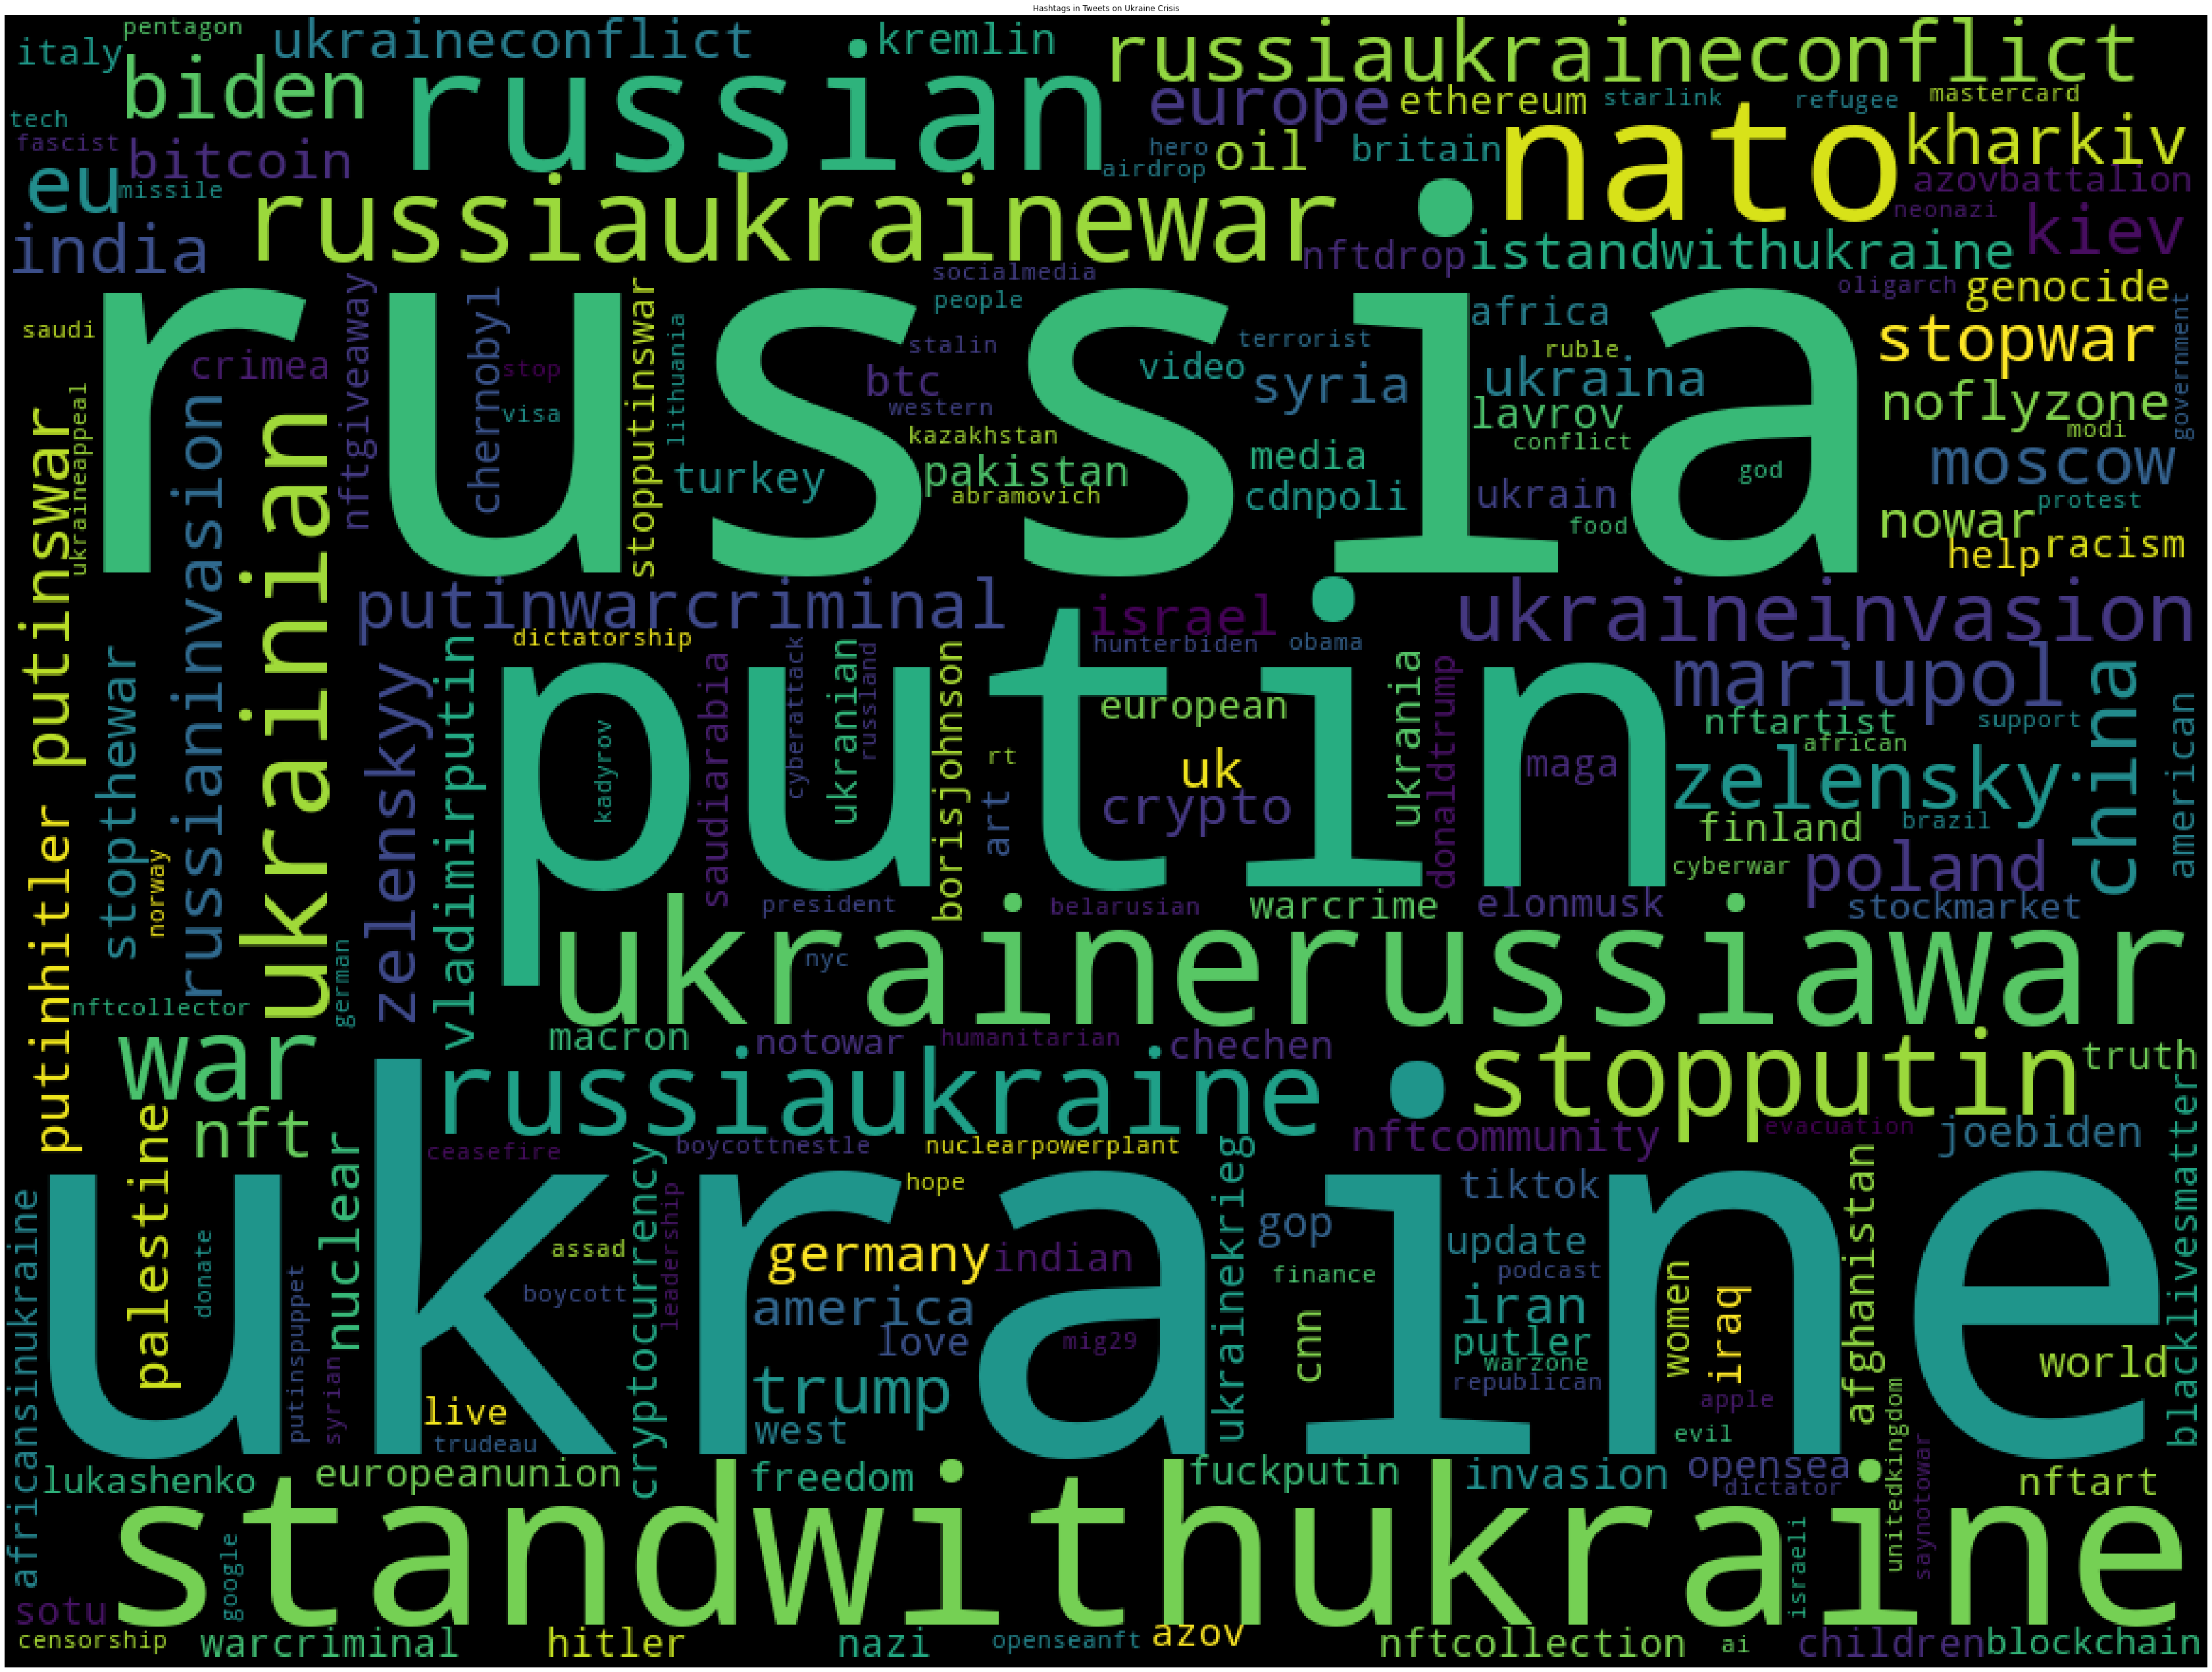

In [207]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(hashtags_clean_df['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(hashtags_clean_df['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()

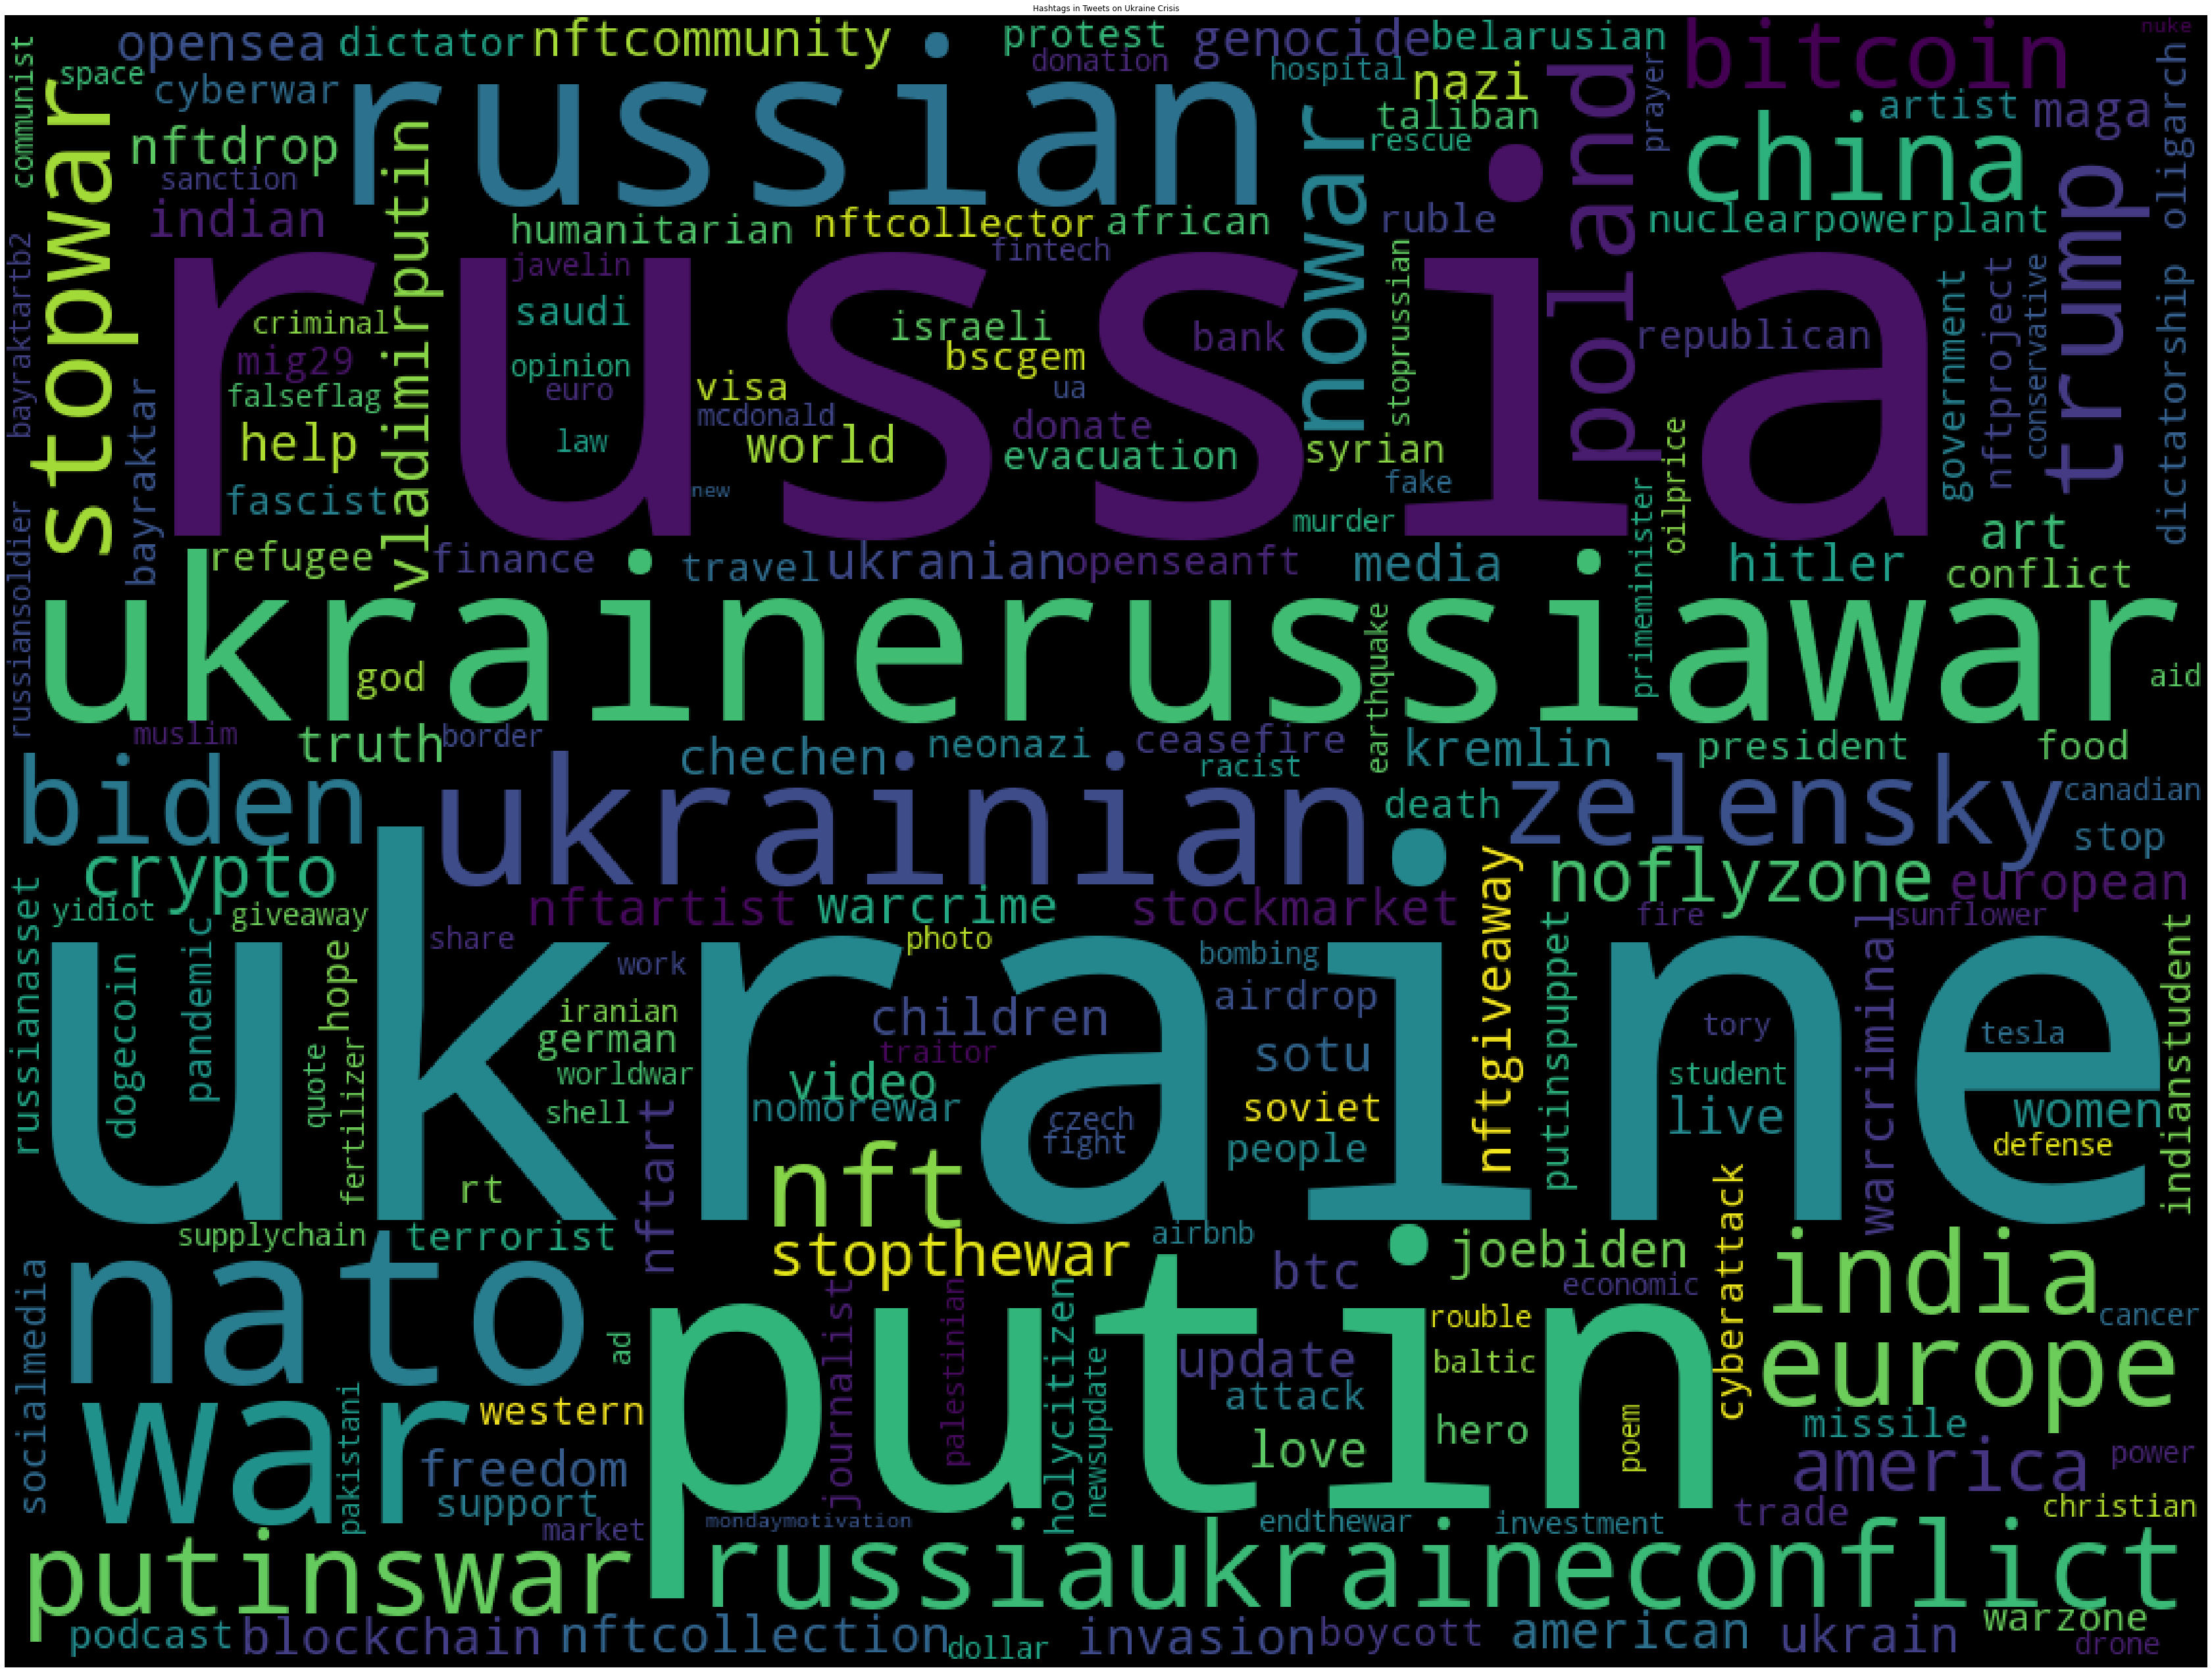

In [209]:
# Create a wordcloud of hashtags
fig,axs = plt.subplots(figsize=(60,60))
random.seed(2022)
random.shuffle(most_freq_tags['hashtag'].tolist())
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(most_freq_tags['hashtag'].tolist()))    
ax=axs.axis("off")   
ax=axs.set_title('Hashtags in Tweets on Ukraine Crisis')
ax=axs.imshow(wordcloud)
plt.show()